# Certamen de Simulación Estocástica - Pregunta 2
- Diego Astaburuaga

**a)** Debemos probar que, $Algo(\alpha)$ es un esquema recursivo probabilistico y que para todo parámetro $\alpha$, el algoritmo termina en tiempo finito con probabilidad 1 y regresa una muestra desde una distribución objetivo.

Claramente el algoritmo es un esquema recursivo probabilístico dado que debe hacer una elección aleatoria que depende de la generación $X$ desde una uniforme, en esto, es capaz de llamarse a si mismo con -el mismo parámetro- que realmente no tiene importancia.

Obviando el parámetro, note que la probabilidad de que el algoritmo no termine en tiempo finito es igual a la probabilidad de que se llame recursivamente de forma infinita. Note que el algoritmo se llama de forma recursiva con probabilidad $1/2$, por lo tanto, el algoritmo se llama asi mismo $n$ veces con probabilidad
$$
(1/2)^n
$$
por lo tanto el algoritmo se llama recursivamente de forma infinita con probabilidad 0, es decir, termina en tiempo finito con probabilidad 1.

Se afirma que $\pi_\alpha=U[1,2,3,4,5]$ discreta para todo $\alpha$, en efecto, sea $\alpha$ en una familia arbitraria de parámetros, por probabilidad condicional, para $i\in \{1,2,3,4,5\}$:
$$
P(X=i) = P(X_0=i) + (1-P(X_0=i))P(X=i) =\frac{1}{10} + \frac{1}{2}P(X=i)
$$
que se se entiende como: el valor que sale será $i$ en dos casos, primero, que no entre en recursión y valga $i$, o que entre recursión y dentro de esta retorne $i$. Resolviendo la ecuación se obtiene que
$$
P(X=i)=\frac{1}{5}
$$
lo que prueba lo pedido.

**b)** Demuestre que Algo2(α) es un algoritmo de simulación perfecta que simula la
distribución uniforme.

proof: Claramente Algo2($\alpha$) es un algoritmo recursivo probabilístico. Utilizando el teorema fundamental de la simulación, probemos que el algoritmo termina en una cantidad finita de pasos con probabilidad 1, para esto, note que si $\beta\leq 5$, entonces la recursión termina, caso contrario, notese que $\beta\leq \alpha$:
$$
P(\text{entra en recursion con parámetro }\beta)=\frac{\beta-\min\{5,\beta\}}{\beta}<\frac{\beta-5}{\beta}=1-\frac{5}{\beta}\leq 1-\frac{5}{\alpha}=\frac{\alpha-5}{\alpha}
$$

bien definido dado que $\alpha > 5$, en caso contrario el algoritmo termina trivialmente en un paso. Por lo tanto la probabilidad de entrar en una n-ésima recursión es menor o igual a
$$
\left(1-\frac{5}{\alpha}\right)^n\rightarrow 0
$$

Nuevamente consideremos que para todo $\alpha$, la distribucion objetivo es la uniforme de 1,2,3,4,5. Si $\alpha\leq 5$ el resultado es trivial, ahora probemos que para $\alpha>5$ el algoritmo es localmente correcto (esto ya se tiene para el caso $\alpha\leq 5$). Dado $\alpha>5$, repitiendo formulamiento anterior, $X$ tomara el valor $i$ cuando inicialmente la distribución uniforme utilizada asi lo determine o bien, cuando esté en recursión, por lo tanto utilizano la propiedad del oraculo
$$
P(X=i)=\frac{1}{\alpha}+\left(\frac{\alpha-5}{\alpha}\right)\frac{1}{5}=\frac{1}{5}
$$
lo que verifica lo pedido.

**c)** Se puede demostrar (no es necesario que lo haga) que Algo3(g), en efecto, un
algoritmo de simulación perfecto que simula datos desde h si g ≥ h:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
import time

# Función de densidad de probabilidad de la distribución de Laplace (g)
def laplace_pdf(x, mu, b):
    return laplace.pdf(x, loc=mu, scale=b)

# Función de densidad de probabilidad de la distribución normal (h)
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi)))*np.exp(-0.5 * ((x - mu) / sigma)**2)

# Algoritmo de Aceptación-Rechazo estándar
def AceptacionRechazo(num_samples, mu, b, M):

    samples = []
    tries = 0
    while len(samples) < num_samples:
        tries += 1
        X = np.random.laplace(mu, b)
        U = np.random.uniform(0, 1)
        if U < normal_pdf(X, mu, b) / (M*laplace_pdf(X, mu, b)):
            samples.append(X)
    return np.array(samples), tries

# Algoritmo Algo3 (Aceptación-Rechazo con recursión)
def Algo3(num_samples, mu, b, M, k=1):
    samples = []
    while len(samples) < num_samples:
        X = np.random.laplace(mu, b)
        U = np.random.uniform(0, 1)
        k += 1
        if U < normal_pdf(X, mu, b) / (M*laplace_pdf(X, mu, b)):
            samples.append(X)
        else:
            Y , k = Algo3(1, mu, b, M, k)
            samples.append(Y[0])
    return np.array(samples), k

num_samples = 100_000
mu = 0  # Media de la distribución
b = 1  # Parámetro de escala de la distribución de Laplace
M = np.max(normal_pdf(np.linspace(-5, 5, 1000), mu, b) / laplace_pdf(np.linspace(-5, 5, 1000), mu, b))

# Simulación con Aceptación-Rechazo
start_time = time.time() 
samples_ar, ar_tries = AceptacionRechazo(num_samples, mu, b, M)
ar_time = time.time() - start_time

# Simulación con Algo3
start_time = time.time() 
samples_algo3, algo3_tries = Algo3(num_samples, mu, b, M)
algo3_time = time.time() - start_time

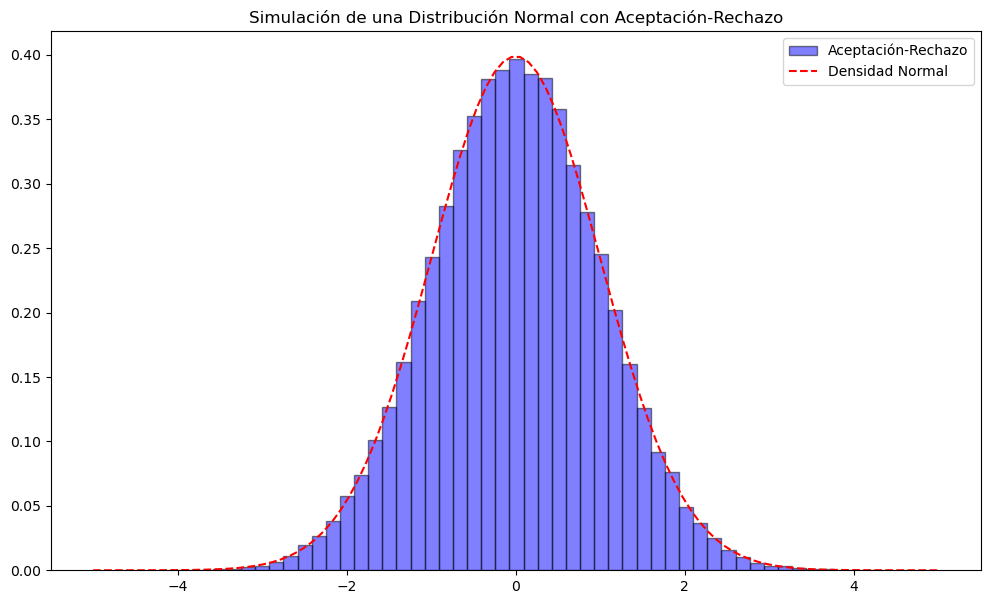

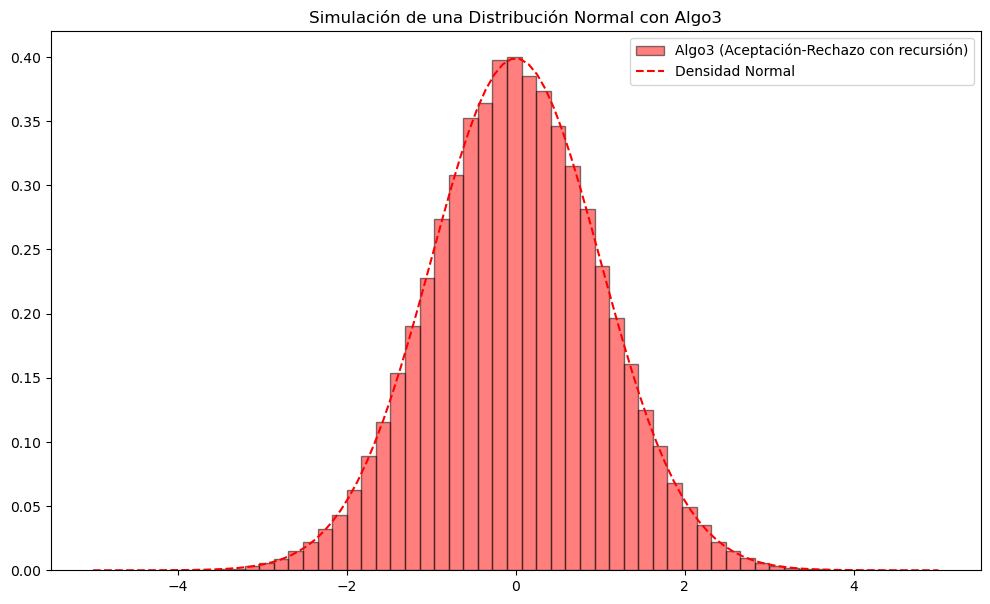

In [27]:
import scipy.stats as stats

# Valores para la densidad de la distribución normal
x = np.linspace(-5, 5, 100)
pdf = stats.norm.pdf(x, loc=mu, scale=b)

# Gráfico de Aceptación-Rechazo
plt.figure(figsize=(12, 7))
plt.hist(samples_ar, bins=50, density=True, alpha=0.5, color='blue', edgecolor='black', label='Aceptación-Rechazo')
plt.plot(x, pdf, 'r--', label='Densidad Normal')
plt.title('Simulación de una Distribución Normal con Aceptación-Rechazo')
plt.legend()

# Gráfico de Algo3
plt.figure(figsize=(12, 7))
plt.hist(samples_algo3, bins=50, density=True, alpha=0.5, color='red', edgecolor='black', label='Algo3 (Aceptación-Rechazo con recursión)')
plt.plot(x, pdf, 'r--', label='Densidad Normal')
plt.title('Simulación de una Distribución Normal con Algo3')
plt.legend()

plt.show()

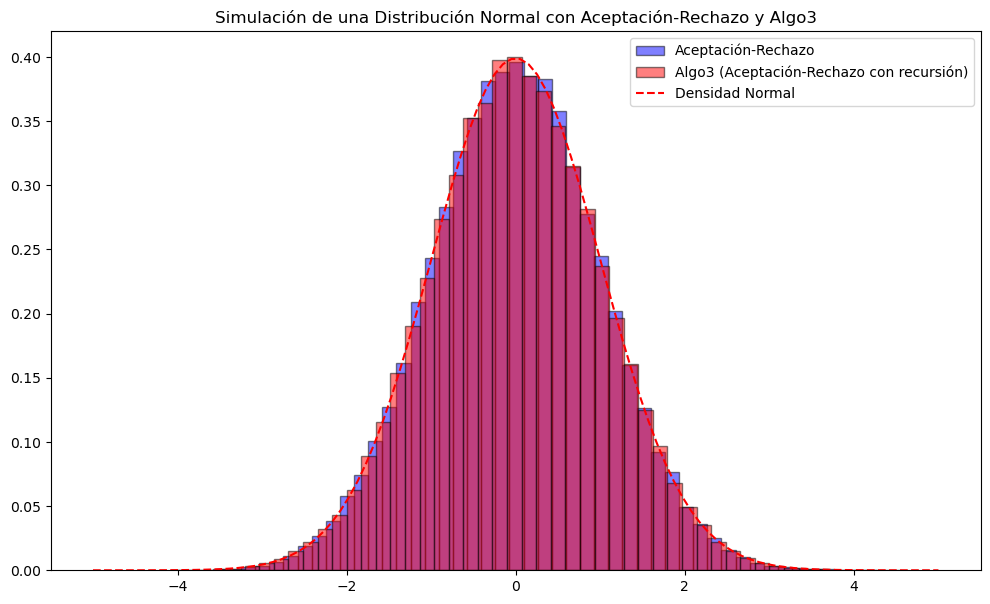

In [42]:
# Histograma de los resultados en un solo gráfico
plt.figure(figsize=(12, 7))

plt.hist(samples_ar, bins=50, density=True, alpha=0.5, color='blue', edgecolor='black', label='Aceptación-Rechazo')
plt.hist(samples_algo3, bins=50, density=True, alpha=0.5, color='red', edgecolor='black', label='Algo3 (Aceptación-Rechazo con recursión)')

# Valores para la densidad de la distribución normal
x = np.linspace(-5, 5, 100)
pdf = stats.norm.pdf(x, loc=mu, scale=b)

# Agregar la densidad de la distribución normal en línea roja punteada
plt.plot(x, pdf, 'r--', label='Densidad Normal')

plt.title('Simulación de una Distribución Normal con Aceptación-Rechazo y Algo3')
plt.legend()
plt.show()

In [39]:
# Matriz de información [tiempo, iteraciones, ejemplos simulados, ratio de aceptación]
info_matrix = np.array([
    [ar_time, ar_tries, num_samples,  num_samples / ar_tries],
    [algo3_time, algo3_tries, num_samples, num_samples / algo3_tries]
])

# Crear una tabla LaTeX con título (caption)
info_text = (
    r'\begin{table}[h]' + '\n' +
    r'\centering' + '\n' +
    r'\caption{Comparación de Algoritmos}' + '\n' +  # Título (caption)
    r'\begin{tabular}{lcccc}' + '\n' +
    r'\hline' + '\n' +
    r'Algoritmo & Tiempo (s) & Iteraciones & Ejemplos Simulados & Ratio de Aceptación \\ \hline' + '\n' +
    r'Aceptación-Rechazo & {:.4f} & {} & {} & {:.6f} \\'.format(*info_matrix[0]) + '\n' +
    r'Algo3 (Aceptación-Rechazo con recursión) & {:.4f} & {} & {} & {:.6f} \\'.format(*info_matrix[1]) + '\n' +
    r'\hline' + '\n' +
    r'\end{tabular}' + '\n' +
    r'\end{table}'
)

# Imprimir información en la consola
print(info_text)

# Copia y pega este texto en tu documento LaTeX


\begin{table}[h]
\centering
\caption{Comparación de Algoritmos}
\begin{tabular}{lcccc}
\hline
Algoritmo & Tiempo (s) & Iteraciones & Ejemplos Simulados & Ratio de Aceptación \\ \hline
Aceptación-Rechazo & 15.7754 & 131569.0 & 100000.0 & 0.760057 \\
Algo3 (Aceptación-Rechazo con recursión) & 15.7515 & 131832.0 & 100000.0 & 0.758541 \\
\hline
\end{tabular}
\end{table}
